## Problem 1

Temperature distribution at $t=0$ in a solid sphere of radius $R$ is given by

$$
T(r, t=0) = \frac{T_{0}}{2}\left( 1 - \text{cos}(\frac{\pi r}{R})\right).
$$

For $t>0$, the surface of the sphere (r=R) is insulated.


In [15]:
import numpy as np
# Given values
R = 3       # cm
rho = 8000  # kg/m^3
Cp = 500   # J/kg.K
k = 15     # W/m.K

# Calculate alpha in m^2/s
alpha_m = k / (rho * Cp)

# Convert alpha to cm^2/s
alpha = alpha_m * 10**4

T0 = 500
r_values = np.linspace(0.001, R, 500)
time_values = [0, 2, 4, 8, 16, 32, 64]

### A. ANALYTICAL SOLUTION

### Part (a) 
By simple energy balance (no differential equations), argue what will be the final (as time goes to infinity) temperature distribution in the sphere (both, profile as well as the quantitative value).

(answer)

Consider the steady state temperature.  
Since the surface of the sphere is insulated, there is no heat transfer across the boundary. This implies that the total energy within the sphere remains constant over time, as there is no energy added to the system or lost from it.

For a sphere geometry: $dV = 4\pi r^2 dr$ and $ 0 < r < R$.
The total energy is:

$$
E = \int_{0}^{R}\rho c_{p}\left( \frac{T_{0}}{2}\left( 1 - \cos(\frac{\pi r}{R}) \right) \right)4 \pi r^2 dr.
$$

Solve this integral:
$$
E = 2 \pi T_{0} \rho c_{p} \int_{0}^{R}(r^2 - r^2 \cos(\frac{\pi r}{R}))dr = \rho c_{p} \left( \frac{2}{3} \pi T_{0}R^3 + 4 T_{0}\frac{R^3}{\pi}  \right)
$$

Let the final temperature $T_{final}$. 
$$
E = m c_{p}T = \int_{dV}\rho c_{p}TdV = \int_{0}^{R}\rho c_{p}T_{final} 4 \pi r^2 dr = \rho c_{p} T_{final} \left( \frac{4}{3}\pi R^3 \right)
$$


Using these equations, solve for $T_{final}$ (i.e., $E=E$).
$$
T_{final} = \left(\frac{1}{2} + \frac{3}{\pi^2}\right)T_{0}
$$

### Part (b) 
Sketch $T(r, t)$ for 5 different values of time between 0 and infinity ($t = 0 < t_{1} < t_{2} < t_{3} < t_{4}$ ; over $0 < r < R)$ to capture the temperature evolution. Be respectful of the magnitudes and slopes.

(answer)

Consider the final temperature:

In [16]:
import numpy as np
print('final temperature = ', 0.5 + 3/(np.pi**2), 'T0')

final temperature =  0.8039635509270133 T0


The bottom figure represents the 5 different values of time between $0$ and $\infty$.  

- Since the boundary condition saids 'insulated', it means that the slopes (i.e., flux) at the boundary at $r=R$ are flat at all different $t_{i}$,
- The final temperature is $0.80 T_{0}$, 
- In this problem, the sphere surface is initially higher temperature. Also, the energy is kept. It means the edge temperature shifts to the center of sphere,
- Hence, the temperature at $r=0$ increases respecting to time. In contrast, the temperature at $r=R$ (surface) goes down.
- Finally, the temperature profile goes to flat over the radius of geometry.

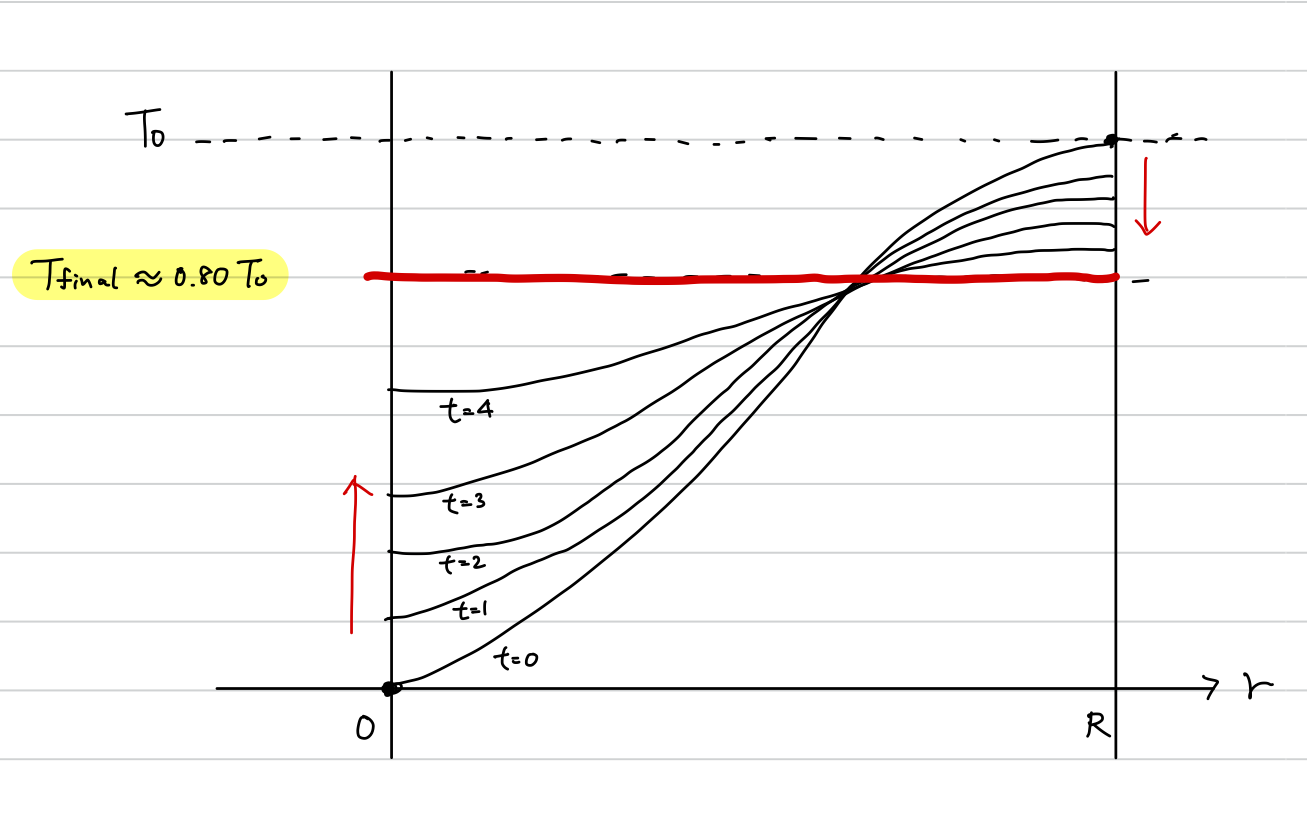

In [17]:
from IPython.display import Image
Image(filename='figures/cp1.png', width=600, height=600)

### Part (c)
Now solve for the temperature distribution in the sphere $T(r, t)$ analytically for $t > 0$

(answer)

Let $T \equiv T_{final}(r) + T_{tr}(r,t)$

The heat conduction equation in sphericla coordinates is:

$$
\frac{1}{r^2} \frac{\partial}{\partial r} \left( r^2 \frac{\partial T_{tr}}{\partial r}\right) = \frac{1}{\alpha}\frac{\partial T_{tr}}{\partial t}
$$
where $\alpha$ is the thermal diffusivity of the material.

Boundary conditions are:  
(1) insulated surface @ $r=R$  
$$
\frac{\partial T_{tr}}{\partial r}|_{r=R} = 0
$$

(2) Symmetry @ $r=0$  
$$
T_{tr}(r=0, t) = \text{finite}
$$

Assume the temperature can be separated into functions of $r$ and $t$:
$$
T_{tr}(r,t) = R(r)\Theta(t)
$$

Substituting this into the heat equation and deviding throughout by $R(r)\Theta(t)$:
$$
\frac{1}{\alpha \Theta}\frac{d\Theta}{dt} = \frac{1}{r^2 R}\frac{d}{dr}\left(r^2 \frac{dR}{dr} \right) \equiv - \lambda^2
$$
where the LHS is a function of $t$ only, and the RHS is a function of $r$ only. For this equation to be valid for all $r$ and $t$, both sides must be equal to a constant denoted as $-\lambda^2$.

(time-dependent part)
$$
\Theta(t) = e^{-\alpha \lambda^2 t}
$$

(radial part)
$$
\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{dR}{dr} \right) + \lambda^2 R(r) = 0
$$

boundary conditions
$$
\frac{dR}{dr}|_{r=0} = 0 
$$
and
$$
\frac{dR}{dr}|_{r=R} = 0
$$

The solution to the radial part of the differential equation is:
$$
R(r) = A \frac{\sin (\lambda r)}{r}
$$

Consider the eigenvalues $\lambda_{n}$, and they are determined from the boundary condition at $r=R$:
$$
\frac{d}{dr}\left( \frac{sin(\lambda r)}{r} \right)|_{r=R} = 0
$$

Expanding the derivative:

$$
\tan(\lambda R) - \lambda R = 0
$$

The solutions $\lambda_{n}$ to this equation are determined by the intersections of the functions $\cos(\lambda R)$ and $\sin (\lambda R)/R$.

Reconstruct the temperature distribution $T(r, t)$:
$$
T(r,t)  = T_{final} + \sum_{n=1}^{\infty} a_{n} \frac{\sin (\lambda_{n}r)}{r} e^{-\alpha \lambda_{n}t}
$$

To find the constants $a_{n}$, utilize the initial condition and orthogonarity:
$$
\int_{r=0}^{R} T(r,0) \frac{\sin(\lambda_{n}r)}{r}r^2 dr = a_{n} \int_{r=0}^{R}\left( \frac{\sin(\lambda_n r)}{r} \right)^2 r^2dr
$$

Therefore,
$$
a_{n} = \frac{1}{N_{n}^2}\int_{r=0}^{R} T(r,0) \frac{\sin(\lambda_{n}r)}{r}r^2 dr
$$
where
$$
N_{n}^{2} \equiv \int_{r=0}^{R}\left( \frac{\sin(\lambda_n r)}{r} \right)^2 r^2dr
$$

We want to study the characteristics of the analytical series solution (eigenvalues, number of terms needed for convergence at different $t_i$, etc).

(a) Evaluate the temperature $T(r, t)$, using the analytical solution obtained above for $t_0 = 0 < t_1 < t_2 < t_3 < t_4 < t_5 < t_6$ , selecting $t_i$ to adequately capture the entire transient. Carry out (i) through (vi). (30 points)

---------

The eigenvalues are:
λ = 1.49780
λ = 2.57508
λ = 3.63471
λ = 4.68873
λ = 5.74025
λ = 6.79043
λ = 7.83982
λ = 8.88868
λ = 9.93720
λ = 10.98546
λ = 12.03354
λ = 13.08148
λ = 14.12930
λ = 15.17704
λ = 16.22471
λ = 17.27233
λ = 18.31989
λ = 19.36742


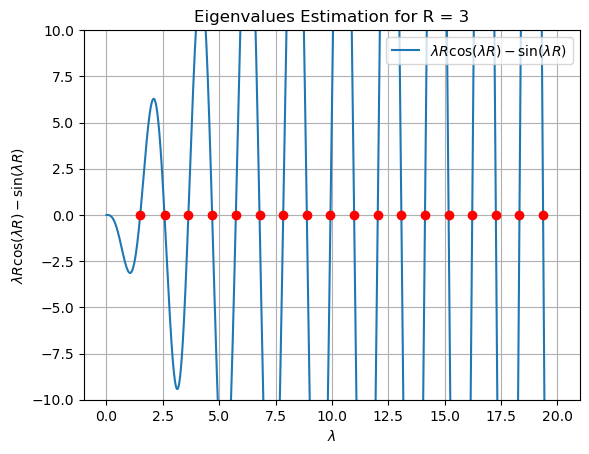

In [18]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Define the function whose roots we want to find
def func(lambda_val, R):
    return lambda_val * R * np.cos(lambda_val * R) - np.sin(lambda_val * R)

# Search for sign changes in the function over a dense grid
lambda_vals = np.linspace(0, 20, 10000)  # Adjust range and density as needed
func_values = [func(val, R) for val in lambda_vals]

bracket_intervals = []
for i in range(1, len(func_values)):
    if func_values[i-1] * func_values[i] < 0:
        bracket_intervals.append((lambda_vals[i-1], lambda_vals[i]))

# Find the roots using the brackets obtained
eigenvalues = []
for bracket in bracket_intervals:
    try:
        root = brentq(func, bracket[0], bracket[1], args=(R))
        eigenvalues.append(root)
    except ValueError:
        pass

# Ensure uniqueness and sort eigenvalues
eigenvalues = sorted(set(eigenvalues))

# Print the eigenvalues
print("The eigenvalues are:")
for lambda_val in eigenvalues:
    print(f"λ = {lambda_val:.5f}")

# Plot the function to visualize the roots
plt.plot(lambda_vals, func_values, label=r'$\lambda R \cos(\lambda R) - \sin(\lambda R)$')
plt.plot(eigenvalues, [0]*len(eigenvalues), 'ro')  # Roots
plt.ylim(-10, 10)  # Limit y-axis to avoid extreme values
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\lambda R \cos(\lambda R) - \sin(\lambda R)$')
plt.title('Eigenvalues Estimation for R = ' + str(R))
plt.grid(True)
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def compute_Nn_square(lam_n):
    """Compute the normalization factor N_n^2."""
    r = np.linspace(1e-9, R, 500)
    integrand = (np.sin(lam_n * r) / r)**2 * r**2
    return np.trapz(integrand, r)

def compute_an(lam_n):
    """Compute the normalized coefficient a_n."""
    r = np.linspace(1e-9, R, 500)
    T_initial = (T0 / 2) * (1 - np.cos(np.pi * r / R))
    Nn_square = compute_Nn_square(lam_n)
    integrand = T_initial * (np.sin(lam_n * r) / r) * r**2
    return np.trapz(integrand, r) / Nn_square

def T_final():
    """Compute the steady-state temperature."""
    return 0.5 * T0 + (3 * T0) / np.pi**2

def T_rt(r, t):
    """Compute the temperature distribution T(r,t)."""
    temperature = np.zeros_like(r) + T_final()
    for lam_n in eigenvalues:
        an = compute_an(lam_n)
        temperature += an * np.where(r == 0, lam_n, np.sin(lam_n * r) / r) * np.exp(-alpha * lam_n**2 * t)
    return temperature

----------------

### Part (I)
For each t ($t = t_0, t_1,… t_6$), estimate how many terms in the series solution are necessary to assure
reasonable convergence.

(answer)  
- As time values $t_{i}$, following values are defined: [0, 2, 4, 8, 16, 32, 64]
- Thermal diffusivity $\alpha = 0.0375$

The temperature distribution at a given time $t$ using $n$ modes can be expressed:
$$
T_{n}(r,t) = \sum_{i=1}^{n} a_{i} \frac{\sin(\lambda_{i}r)}{r}e^{-\alpha \lambda_{i}^{2}t}
$$
Then, compute the temperature distribution for $n+1$ modes:
$$
T_{n+1}(r,t) = T_{n}(r,t) + a_{n+1} \frac{\sin(\lambda_{n+1}r)}{r}e^{-\alpha \lambda_{n+1}^{2}t}
$$
The error estimation function is defined by:
$$
\Delta T(r,t) = |T_{n+1}(r,t) - T_{n}(r,t)| < \epsilon
$$

In this problem, the convergence value $\epsilon = 10^{-3}$ was employed.

In [20]:
def estimate_terms_by_error(r, R, T0, alpha, eigenvalues, time_values, threshold=1e-3):
    """Estimate number of terms for convergence using Error Estimation method."""
    num_terms_required = []
    
    for t in time_values:
        prev_temperature = np.zeros_like(r) + T_final()
        converged = False
        for i, lam_n in enumerate(eigenvalues):
            an = compute_an(lam_n)  # Using the existing compute_an function
            # Compute current temperature profile with i terms
            current_temperature = prev_temperature + an * (np.sin(lam_n * r) / r) * np.exp(-alpha * lam_n**2 * t)
            
            # Compare with previous profile
            error = np.max(np.abs(current_temperature - prev_temperature))
            if error < threshold:
                converged = True
                num_terms_required.append(i + 1)  # Adding 1 because indices start from 0
                break
            
            prev_temperature = current_temperature
        
        # If not converged for any eigenvalue
        if not converged:
            num_terms_required.append(len(eigenvalues))
    
    return num_terms_required

# Test the function
num_terms = estimate_terms_by_error(r_values, R, T0, alpha, eigenvalues, time_values)
print(num_terms)


[18, 9, 7, 5, 4, 3, 2]


### Part (II)
Show the impact of the number of terms kept in the series solution for each value of $t_i$ on a separate graph.  
(Plot $T(r, t_i)$ for increasingly larger number of terms kept in the series.).

(answer)

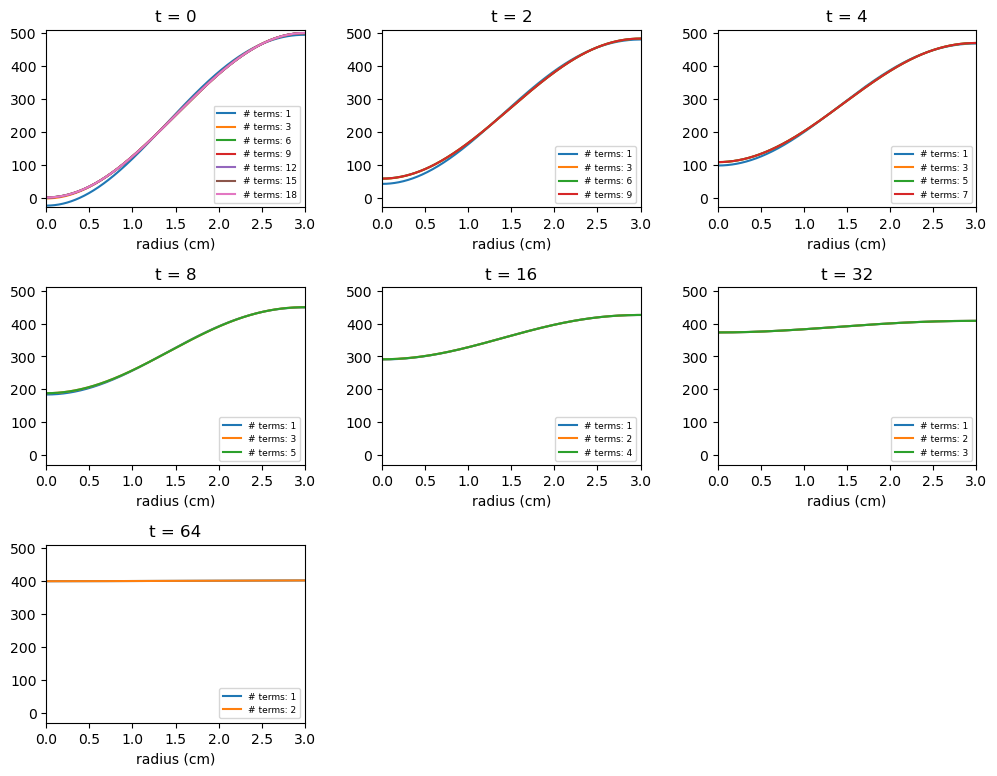

In [21]:
def T_rt_subset(r, t, R, T0, alpha, eigenvalues):
    """Compute the temperature distribution T(r,t) using a subset of eigenvalues."""
    temperature = np.zeros_like(r) + T_final()
    for lam_n in eigenvalues:
        an = compute_an(lam_n)  # Using the existing compute_an function
        temperature += an * np.where(r == 0, lam_n, np.sin(lam_n * r) / r) * np.exp(-alpha * lam_n**2 * t)
    return temperature

# Estimate the number of terms required for convergence for the time values
#num_terms_estimates_error = estimate_terms_by_error(r_values, R, T0, alpha, eigenvalues, time_values)


fig, ax = plt.subplots(3,3, figsize=(12,9))
plt.subplots_adjust(wspace=0.3, hspace=0.45)
axes = ax.flatten()

flags = [
    [1, 3, 6, 9, 12, 15, 18],
    [1, 3, 6, 9],
    [1, 3, 5, 7],
    [1, 3, 5],
    [1, 2, 4],
    [1, 2, 3],
    [1, 2]
]

for idx, (current_ax, current_flag) in enumerate(zip(axes, flags)):
    for f in current_flag:
        current_ax.plot(r_values, T_rt_subset(r_values, time_values[idx], R, T0, alpha, eigenvalues[:f]), label='# terms: ' + str(f))
    current_ax.legend(fontsize=6.5, loc=4)
    current_ax.set_xlabel('radius (cm)')
    current_ax.set_title('t = ' + str(time_values[idx]))
    current_ax.set_xlim(0, R)
    current_ax.set_ylim(-30, 510)

axes[-1].axis('off')
axes[-2].axis('off')

plt.show()

### Part (III)
Report the summary for all cases in a table.

(answer)

The table contains 'time' and corresponding number of modes for convergence $\epsilon < 10^{-3}$.

In [22]:
import pandas as pd

report = pd.DataFrame()
report['Time'] = time_values
report['Modes'] = num_terms

report

,Time,Modes
0,0,18
1,2,9
2,4,7
3,8,5
4,16,4
5,32,3
6,64,2


### Part (IV)
Plot the converged $T(r, t_{i})$ as a function of $r (0 < r < R)$ for all seven cases on the same graph.
  
(answer)

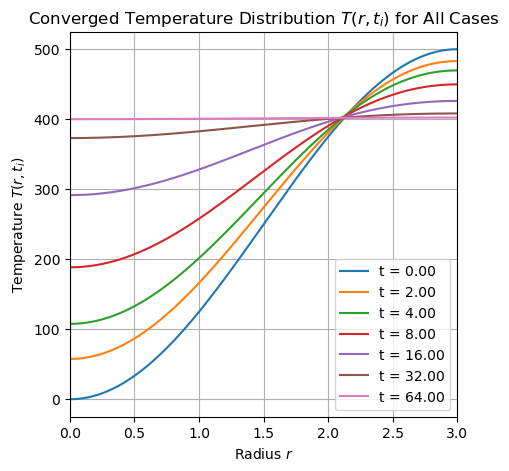

In [23]:
fig, ax = plt.subplots(1,1, figsize=(5,5))


for t in time_values:
    ax.plot(r_values, T_rt_subset(r_values, t, R, T0, alpha, eigenvalues), label=f't = {t:.2f}')

ax.set_title("Converged Temperature Distribution $T(r, t_{i})$ for All Cases")
ax.set_xlabel("Radius $r$")
ax.set_ylabel("Temperature $T(r, t_{i})$")
ax.legend()
ax.grid(True)
ax.set_xlim(0, R)
plt.show()


### Part (V)
Tabulate your eigenvalues, and show all steps in an Appendix.
  
(answer)

In [24]:
report_eigenvalues = pd.DataFrame()
report_eigenvalues['Eigenvalues'] = eigenvalues

report_eigenvalues

,Eigenvalues
0,1.497803
1,2.575084
2,3.634707
3,4.688731
4,5.740252
5,6.790434
6,7.839817
7,8.888685
8,9.937200
9,10.985463


### Part (VI)

Comment on the convergence properties of the analytical solution (impact of number of terms needed for convergence)

(answer)

The convergence of the series solution is determined by how quickly the transient terms decay over time. 
As we saw in Part (II), the number of modes (series) for convergence is varied depending on time $t$.

- As time progresses, the number of modes required for reasonable convergence seems to decrease. This is evident from the similarity in the curves for higher time values even when fewer modes are used.
- As time approaches infinity, the temperature profile approaches a steady-state distribution. The rapid decay of the higher modes ensures that the steady-state solution is predominantly determined by the lowest mode.
- This is consistent with the observation that the number of modes required for convergence decreases as we approach the steady-state.

--------------

## NUMERICAL SOLUTION  
Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit in time).
Show your work and include your computer code in an Appendix.

### (a) For the numerical solution obtained using an explicit finite difference method:

### Part (I) 
Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

(answer)  
In this problem, we solve the following equation using a finite difference method (central differences for space, and explicit in time):
$$
\frac{1}{\alpha}\frac{\partial T}{\partial t} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 \frac{\partial T}{\partial r} \right)
$$

To solve this equation, we discretize $T$ in both space and time. Define the spatial grid spacing as $\Delta r$ and the temporal grid spacing as $\Delta t$.

For the spatial derivative, using the central difference scheme:
$$
\frac{\partial^2 T}{\partial r^2}|_{i} \approx \frac{T_{i+1}^{n} - 2 T_{i}^{n} + T_{i-1}^{n}}{\Delta r^2}
$$

$$
\frac{\partial T}{\partial r}|_{i} \approx \frac{T_{i+1}^{n} - T_{i-1}^{n}}{2 \Delta r}
$$


Using these approximations and incorporating the spherical coordinate term, the discretized form of the equation becomes:
$$
\frac{T_{i}^{n+1} - T_{i}^{n}}{\Delta t} = \frac{1}{\alpha}\left( \frac{1}{r_{i}^{2}} \frac{\partial}{\partial r} \left( r_{i}^{2} \frac{T_{i+1}^{n} - T_{i-1}^{n}}{2\Delta r} \right) \right)
$$
Then, we will get:
$$
T_{i}^{n+1} = T_{i}^{n} + \frac{\Delta t}{\alpha} \left(\frac{1}{r_{i}^2} \left( r_{i}^{2} \frac{T_{i+1}^{n}- T_{i-1}^{n}}{2\Delta r}\right)_{i+1} - \frac{1}{r_{i}^2} \left( r_{i}^{2} \frac{T_{i+1}^{n}- T_{i-1}^{n}}{2\Delta r}\right)_{i+1}  \right) /\Delta r
$$

This formula can be used to update the temperature field in an explicit manner, moving forward in time.

For the initial condition:
$$
T(r,0) = \frac{T_{0}}{2} \left( 1 - \cos(\frac{\pi r}{R}) \right)
$$

For the study of the grid size, the $\Delta t$ was fixed to $10^{-2}$.

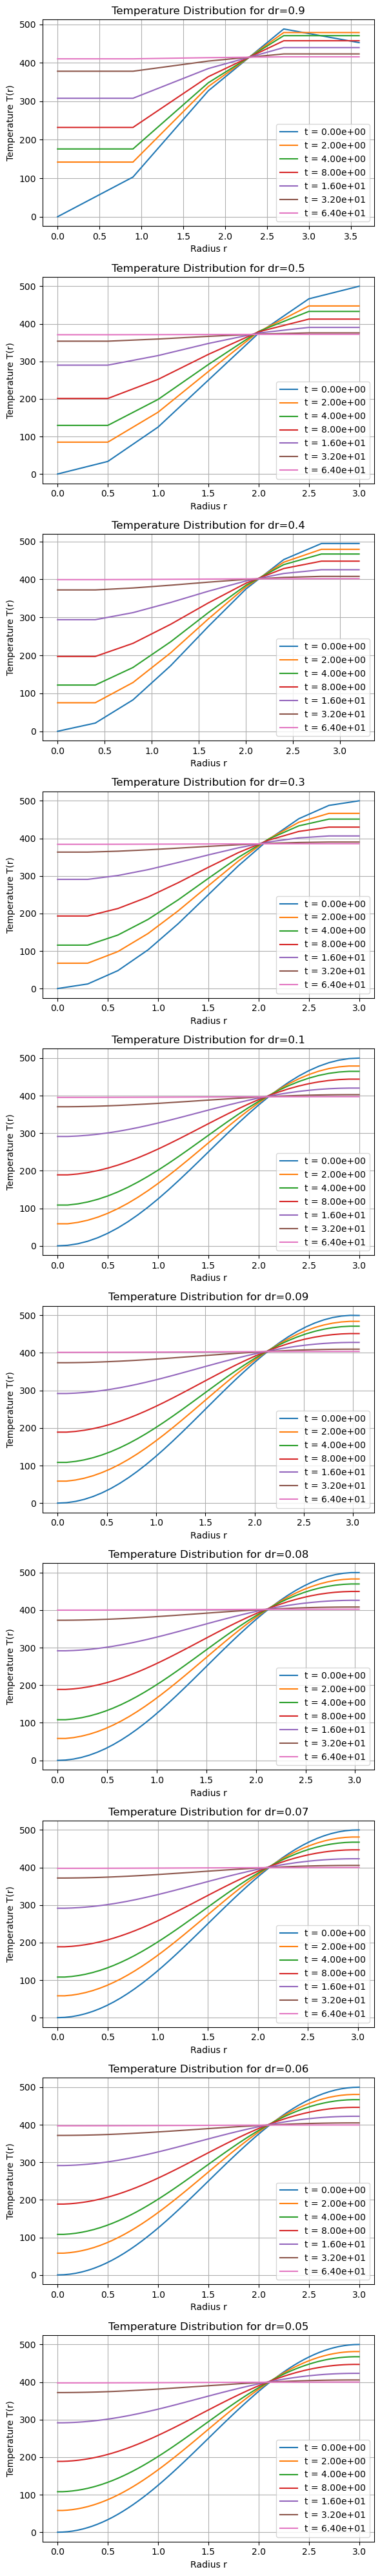

In [25]:
def initialize_temperature(r, R, T0):
    """Initial temperature distribution."""
    return T0/2 * (1 - np.cos(np.pi * r / R))

def explicit_method(T, alpha, dr, dt, r):
    N = len(T)
    T_new = T.copy()

    for i in range(1, N-1):
        T_new[i] = T[i] + alpha * dt / dr**2 * (T[i+1] - 2*T[i] + T[i-1]) + alpha * dt / (r[i]*dr) * (T[i+1] - T[i-1])
        
    # Boundary conditions
    T_new[0] = T_new[1]
    T_new[-1] = T_new[-2]

    return T_new

def solve_heat_equation_explicit(R, T0, alpha, dr, dt, max_time, time_points):
    r = np.arange(0, R + dr, dr)
    T = initialize_temperature(r, R, T0)
    times = np.arange(0, max_time, dt)
    stored_profiles = {}

    for t in times:
        if t in time_points:
            stored_profiles[t] = T.copy()
        T = explicit_method(T, alpha, dr, dt, r)

    return r, stored_profiles

# Parameters
dt = 1e-2
max_time = 100
time_points = time_values
dr_values = [0.9, 0.5, 0.4, 0.3, 0.10, 0.09, 0.08, 0.07, 0.06, 0.05]
fig, axes = plt.subplots(len(dr_values), 1, figsize=(6, 4*len(dr_values)))

for idx, dr in enumerate(dr_values):
    r_values, stored_profiles = solve_heat_equation_explicit(R, T0, alpha, dr, dt, max_time, time_points)
    
    # Plotting the temperature distribution for the stored time points
    for t, T in stored_profiles.items():
        axes[idx].plot(r_values, T, '-', label=f't = {t:.2e}')
        axes[idx].set_xlabel('Radius r')
        axes[idx].set_ylabel('Temperature T(r)')
        axes[idx].set_title(f'Temperature Distribution for dr={dr}')
        axes[idx].grid(True)
        axes[idx].legend()

plt.tight_layout()
plt.show()


Above figures show the temperature profiles for each $\Delta r$ searched in the previous cell (study).  
As it is indicated, when $\Delta r < 0.1$ the temperature $T(r,t)$ is converged and looks smooth.  
Therefore, the reasonalbe $\Delta r$ is 0.1 in this study.

--------------
### Part (II)
As the same as the $\Delta r$ study, we will perform for the temporal space $\Delta t$.
In this study, the $\Delta r$ was fixed to $\Delta r = 0.1$.

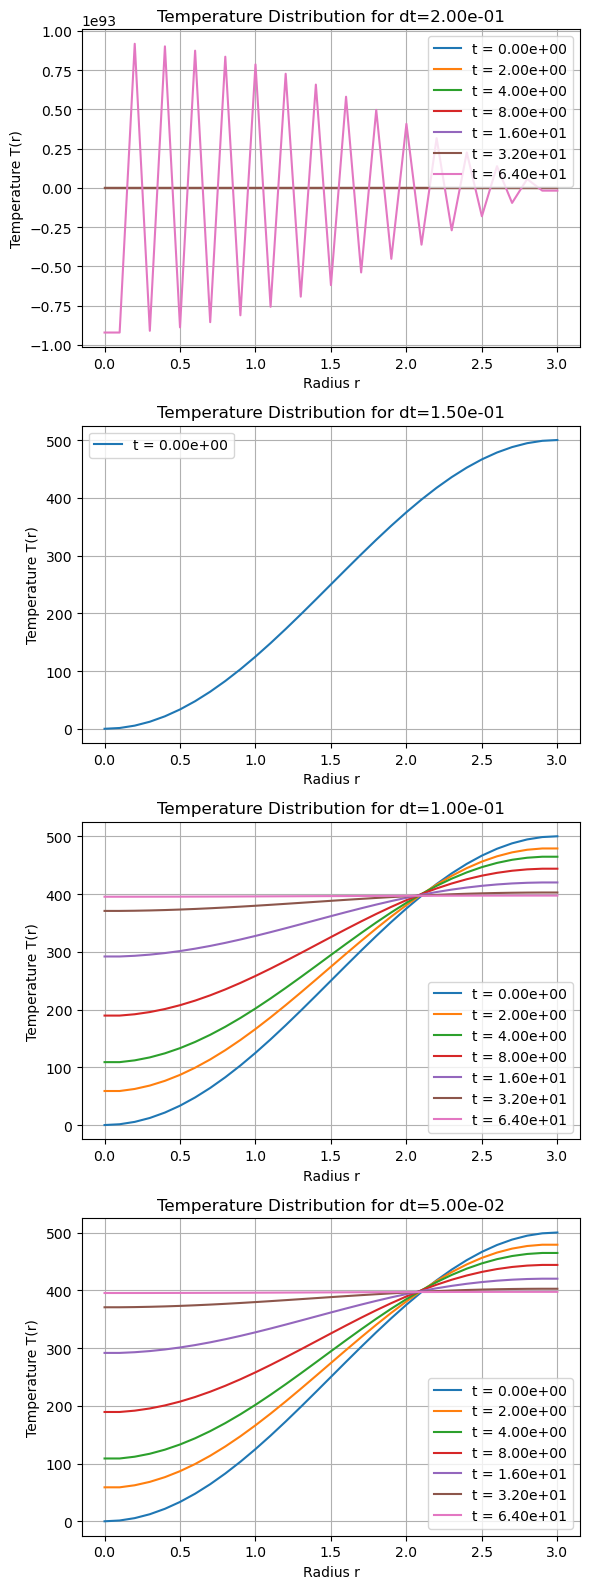

In [26]:
dt_values = [0.20, 0.15, 0.10, 0.05]
fig, axes = plt.subplots(len(dt_values), 1, figsize=(6, 4*len(dt_values)))

# from study (I)
dr = 0.1

for idx, dt in enumerate(dt_values):
    r_values, stored_profiles = solve_heat_equation_explicit(R, T0, alpha, dr, dt, max_time, time_points)
    
    # Plotting the temperature distribution for the stored time points
    for t, T in stored_profiles.items():
        axes[idx].plot(r_values, T, '-', label=f't = {t:.2e}')
        axes[idx].set_xlabel('Radius r')
        axes[idx].set_ylabel('Temperature T(r)')
        axes[idx].set_title(f'Temperature Distribution for dt={dt:.2e}')
        axes[idx].grid(True)
        axes[idx].legend()

plt.tight_layout()
plt.show()


For the fixed $\Delta r = 0.1$, several $\Delta t$ values are searched.  
As it is depicted avobe, the reasonable $\Delta t$ is $0.1$.  
In other words, when $\Delta t > 0.1$, the temperature $T(r,t)$ is not converged.


### Part (III)

In [27]:
def explicit_method(T, alpha, dr, dt, r):
    N = len(T)
    T_new = T.copy()

    for i in range(1, N-1):
        T_new[i] = T[i] + alpha * dt / dr**2 * (T[i+1] - 2*T[i] + T[i-1]) + alpha * dt / (r[i]*dr) * (T[i+1] - T[i-1])
        
    # Boundary conditions
    T_new[0] = T_new[1]
    T_new[-1] = T_new[-2]

    return T_new

def solve_heat_equation_explicit(R, T0, alpha, dr, dt, max_time, time_points):
    r = np.arange(0, R + dr, dr)
    T = initialize_temperature(r, R, T0)
    times = np.arange(0, max_time, dt)
    stored_profiles = {}

    for t in times:
        if t in time_points:
            stored_profiles[t] = T.copy()
        T = explicit_method(T, alpha, dr, dt, r)

    return r, stored_profiles

/var/folders/m2/q04dcnhs4yj_6ml80j57mmk80000gp/T/ipykernel_29881/2169583124.py:6: RuntimeWarning: invalid value encountered in divide
  temperature += an * np.where(r == 0, lam_n, np.sin(lam_n * r) / r) * np.exp(-alpha * lam_n**2 * t)


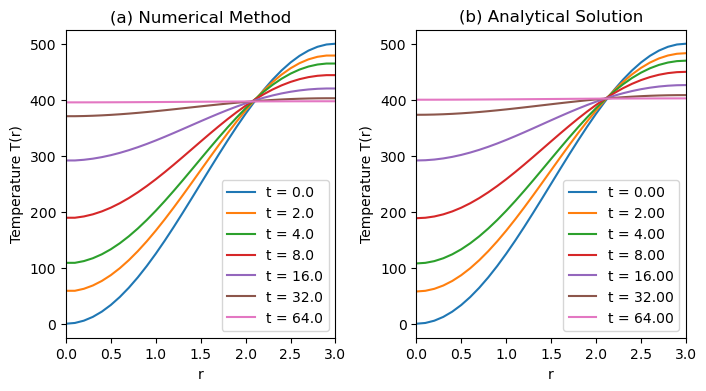

In [29]:
# Part (I)
dr = 0.1

# part (II)
dt_values = 0.1

r_values, stored_profiles = solve_heat_equation_explicit(R, T0, alpha, dr, dt, max_time, time_points)
tags = list(stored_profiles.keys())

fig, ax = plt.subplots(1,2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

# Plotting
for t, profile in stored_profiles.items():
    ax[0].plot(r_values, profile, label=f't = {t}')
ax[0].set_xlabel('r')
ax[0].set_ylabel('Temperature T(r)')
ax[0].set_title('(a) Numerical Method')
ax[0].set_xlim(0, R)
ax[0].legend()


for t in time_values:
    ax[1].plot(r_values, T_rt_subset(r_values, t, R, T0, alpha, eigenvalues), label=f't = {t:.2f}')


ax[1].legend()
ax[1].set_xlabel('r')
ax[1].set_ylabel('Temperature T(r)')
ax[1].set_title('(b) Analytical Solution')
ax[1].set_xlim(0, R)
plt.show()